<a href="https://colab.research.google.com/github/sparab2/MachineLearning/blob/main/Homework4Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

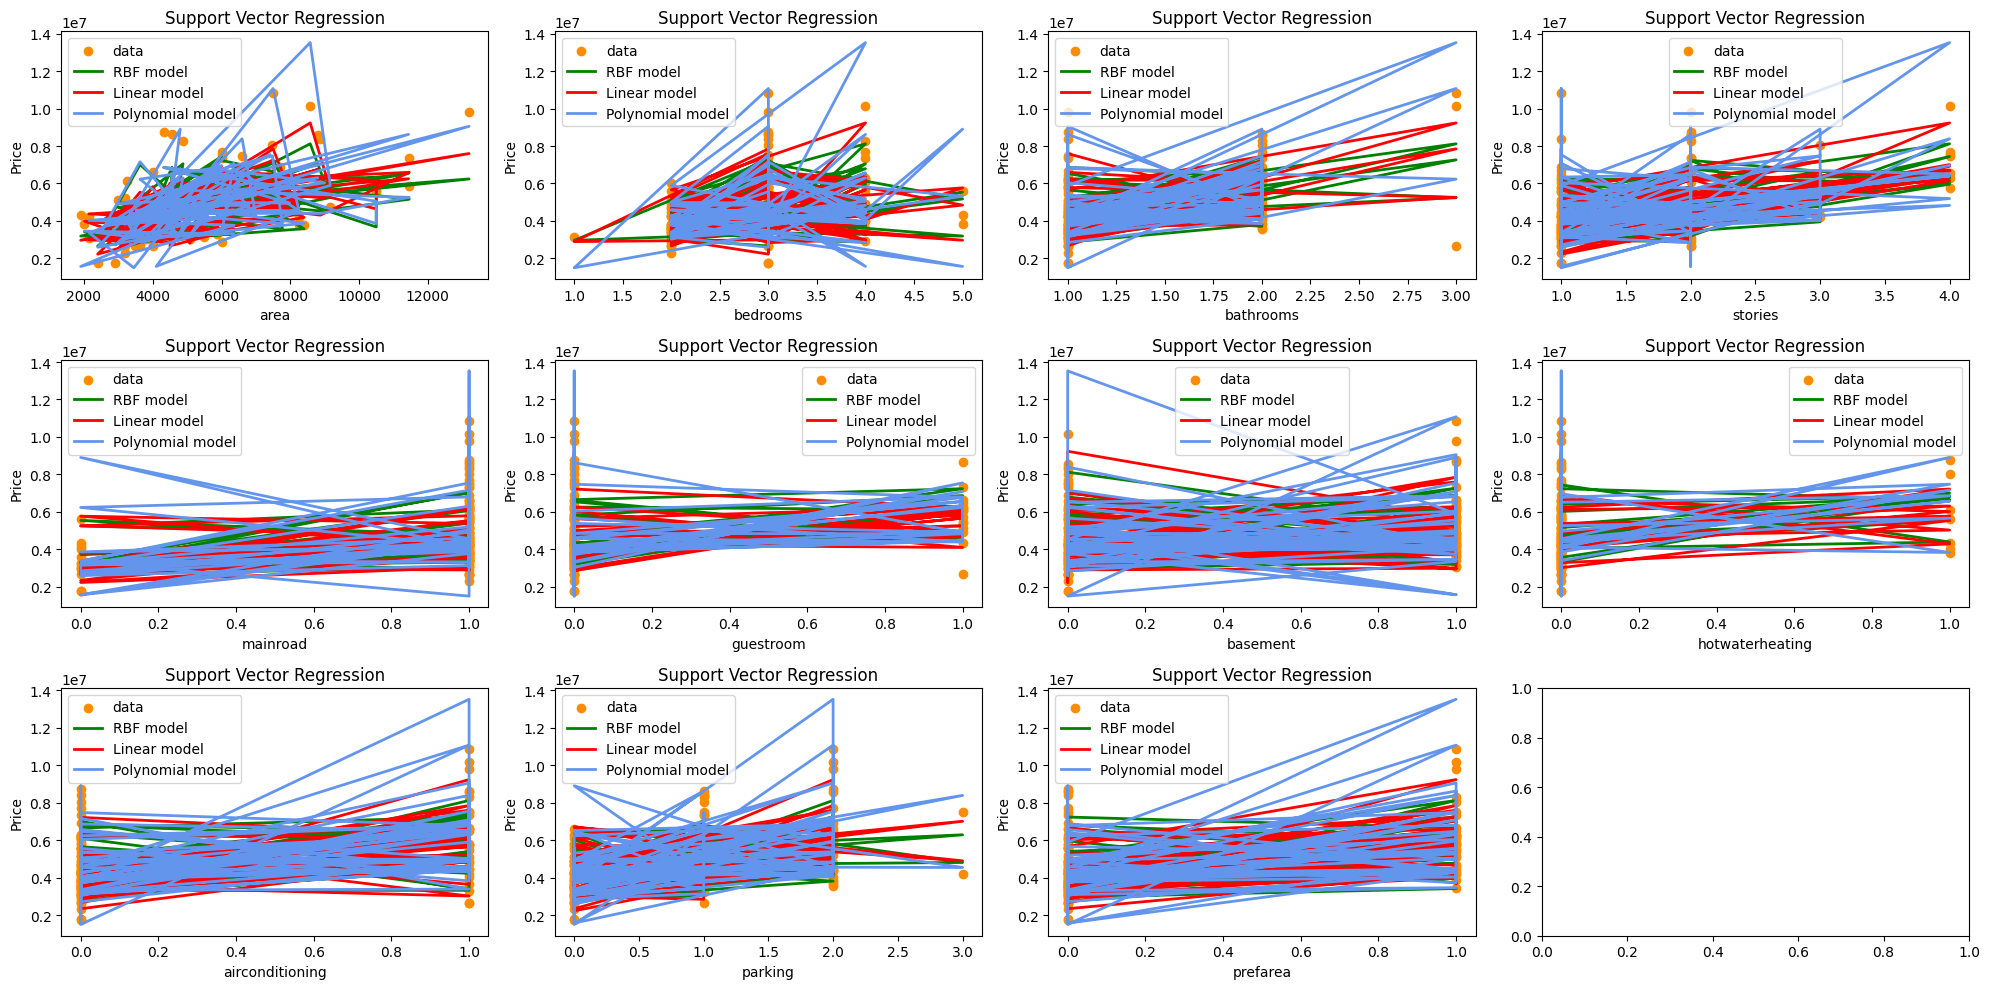

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Loading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/sparab2/MachineLearning/main/Housing.csv')

# Converting the binary variables to 0/1
binary_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_vars] = df[binary_vars].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# Convert categorical variable to numerical
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished': 1, 'semi-furnished': 0.5, 'unfurnished': 0})

# Select the required input variables and target variable
input_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
target_var = ['price']

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(df[input_vars], df[target_var], test_size=0.2, random_state=436)

# Scale the input variables
scaler_X = StandardScaler()
scaler_Y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
Y_train_scaled = scaler_Y.fit_transform(Y_train)
Y_test_scaled = scaler_Y.transform(Y_test)

# Training the SVR models
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X_train_scaled, Y_train_scaled.ravel())

svr_lin = SVR(kernel='linear')
svr_lin.fit(X_train_scaled, Y_train_scaled.ravel())

svr_poly = SVR(kernel='poly')
svr_poly.fit(X_train_scaled, Y_train_scaled.ravel())

# Make predictions on the testing set
Y_pred_rbf = scaler_Y.inverse_transform(svr_rbf.predict(X_test_scaled).reshape(-1, 1))
Y_pred_lin = scaler_Y.inverse_transform(svr_lin.predict(X_test_scaled).reshape(-1, 1))
Y_pred_poly = scaler_Y.inverse_transform(svr_poly.predict(X_test_scaled).reshape(-1, 1))

# Plot the results for all input parameters
fig, axs = plt.subplots(3, 4, figsize=(20, 10))

for i, var in enumerate(input_vars):
    row = i // 4
    col = i % 4
    axs[row, col].scatter(X_test[var], Y_test.values, color='darkorange', label='data')
    axs[row, col].plot(X_test[var], Y_pred_rbf, color='green', lw=2, label='RBF model')
    axs[row, col].plot(X_test[var], Y_pred_lin, color='red', lw=2, label='Linear model')
    axs[row, col].plot(X_test[var], Y_pred_poly, color='cornflowerblue', lw=2, label='Polynomial model')
    axs[row, col].set_xlabel(var)
    axs[row, col].set_ylabel('Price')
    axs[row, col].set_title('Support Vector Regression')
    axs[row, col].legend()

plt.tight_layout()
plt.show()


In [18]:
# Perform PCA on the training data
from sklearn.decomposition import PCA

# Number of principal components to try
K = 10

# List to store regression scores for each number of principal components
scores = []

for k in range(1, K+1):
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    # Train the SVR model on the PCA-transformed data
    svr = SVR(kernel='rbf')
    svr.fit(X_train_pca, Y_train_scaled.ravel())
    
    # Make predictions on the testing set
    Y_pred = scaler.inverse_transform(svr.predict(X_test_pca).reshape(-1, 1))
    
    # Compute the regression score (R-squared) for the predictions
    score = svr.score(X_test_pca, Y_test_scaled)
    scores.append(score)

# Find the number of principal components that achieves the highest score
best_k = np.argmax(scores) + 1

print(f"The best number of principal components is {best_k} with a score of {scores[best_k-1]:.3f}")


The best number of principal components is 2 with a score of 0.644


In [19]:
# Training the SVR models with different kernels
svr_lin = SVR(kernel='linear')
svr_lin.fit(X_train_pca, Y_train.values.ravel())

svr_poly = SVR(kernel='poly')
svr_poly.fit(X_train_pca, Y_train.values.ravel())

svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X_train_pca, Y_train.values.ravel())

# Making predictions on the testing set
Y_pred_lin = svr_lin.predict(X_test_pca)
Y_pred_poly = svr_poly.predict(X_test_pca)
Y_pred_rbf = svr_rbf.predict(X_test_pca)

# Calculating the accuracies of the SVR models
accuracy_lin = svr_lin.score(X_test_pca, Y_test)
accuracy_poly = svr_poly.score(X_test_pca, Y_test)
accuracy_rbf = svr_rbf.score(X_test_pca, Y_test)

print('Accuracy of linear kernel:', accuracy_lin)
print('Accuracy of polynomial kernel:', accuracy_poly)
print('Accuracy of RBF kernel:', accuracy_rbf)

Accuracy of linear kernel: -0.1297479459536357
Accuracy of polynomial kernel: -0.1302596841491177
Accuracy of RBF kernel: -0.1302773385991718
